# Problem Set 4: Networks

In this problem set we are going to be working with network-like data. We will be using a smaller dataset obtained from foursquare's API in Riyadh. The dataset was constructed by scrapping an API endpoint that given a venue, it lists the next top 5 venues where users usually check-in afterwards. All the data is aggregated, and the specifics of each trip, or check-in sequence are not available. However, it can provide a good overview of some general dynamics around the city. 

In the dataset, every node of venue, is connected to at least other node or venue. More popular nodes will be connected to more nodes, or will have more edges attached to them. Additionally, by constructing a network with the data, we can analyze some other interesting properties that might give us some insights of the urban dynamics of the region.

1. Constructing a network with the dataset.
2. Assigning spatial properties to the network.
3. Analyzing some basic network properties.
4. Constructing exploratory visualizations that help us make sense out of our analysis and dataset.

In [20]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# This allows plots to appear on the IPython notebook.
%matplotlib inline 

The data is contained in two different `CSV` files: `FoursqureLinksNetwork.csv` and `FoursqureCheckinNodes.csv`. First, we will import the CSV containing all the edges among **Foursquare** venues, and construct a `networkx` network. In this case, the node index or name will be the venue ID.

In [21]:
# Use pandas to import the csv
df_edges = pd.read_csv('data/FoursqureLinksNetwork.csv', sep=",")
print df_edges.dtypes
df_edges.head(1)
np.sum(df_edges['FROM-ID']=="4b65bb89f964a52059fc2ae3")

FROM-ID      object
TO-ID        object
DISTANCE    float64
dtype: object


5

Next, we will import the CSV containing all the nodes representing **Foursquare** venues.

In [22]:
df_nodes = pd.read_csv('data/FoursqureCheckinNodes.csv', sep=",")
print df_nodes.dtypes
df_nodes.head(1)
np.sum(df_nodes['ID']=="4b65bb89f964a52059fc2ae3")

ID           object
NAME         object
CATEGORY     object
CHECK-IN      int64
LAT         float64
LONG        float64
dtype: object


3

## Part 1

Now, using your recently acquired **Pandas** knowledge, use **Pandas'** `.join` or `.merge` functions, to match the index of the origin id with its latitude and longitude (we want to add new columns with the lat and lon values for a given node). Add a **lat1 and lon1** column to the df_edge containing this information. Do the same with the destination id, but name the respective columns **lat2 and lon2**.

**Deliverable**
* A pandas DF with 4 new columns: the columns should correspond to the lat and lon of the **FROM-ID** and **TO-ID** columns.

In [23]:
# Your Code here

# Subset dataframe "df_loc" from "df_nodes" which only contains 'ID','LAT' and 'LONG'
df_loc= df_nodes[['ID','LAT','LONG']]
print df_loc.dtypes
print df_loc.head(1)

# reset index of 'df_loc', which is very important
df_loc.reset_index(level=0, inplace=True)
print df_loc.dtypes
print df_loc.head(1)

# reset index of 'df_edges', which is very important
df_edges.reset_index(level=0, inplace=True)
print df_edges.dtypes
df_edges.head(1)

ID       object
LAT     float64
LONG    float64
dtype: object
                         ID        LAT       LONG
0  558e5ce5498e164a5cb27afc  24.760483  46.705338
index      int64
ID        object
LAT      float64
LONG     float64
dtype: object
   index                        ID        LAT       LONG
0      0  558e5ce5498e164a5cb27afc  24.760483  46.705338
index         int64
FROM-ID      object
TO-ID        object
DISTANCE    float64
dtype: object


,index,FROM-ID,TO-ID,DISTANCE
0,0,4f3381cae4b0befff0254890,4d90bb7ffa9437048ca338c6,0.050111


In [24]:
df_edges=df_edges[['index','FROM-ID','TO-ID','DISTANCE']]
df_edges.columns=['index_edges','FROM-ID','TO-ID','DISTANCE']
df_edges.head(1)

,index_edges,FROM-ID,TO-ID,DISTANCE
0,0,4f3381cae4b0befff0254890,4d90bb7ffa9437048ca338c6,0.050111


In [25]:
df_loc.head(1)

,index,ID,LAT,LONG
0,0,558e5ce5498e164a5cb27afc,24.760483,46.705338


In [27]:
## Use Merge function is better than join here
##merge(left, right, how='inner', on=None, left_on=None, right_on=None,
      ##left_index=False, right_index=False, sort=True,
      ##suffixes=('_x', '_y'), copy=True, indicator=False)
# Merge step1: Merge FROM-ID with ID first
df_from=pd.merge(df_edges, df_loc, how='inner', on=None, left_on='FROM-ID', right_on='ID',
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)
df_from.head(2)

,index_edges,FROM-ID,TO-ID,DISTANCE,index,ID,LAT,LONG
0,360,4b65bb89f964a52059fc2ae3,4b503b59f964a520dc1e27e3,0.097335,48,4b65bb89f964a52059fc2ae3,24.699586,46.692538
1,360,4b65bb89f964a52059fc2ae3,4b503b59f964a520dc1e27e3,0.097335,49,4b65bb89f964a52059fc2ae3,24.699396,46.691686


In [28]:
# Select only part of the columns from the whole dataframe 
df_from=df_from[['FROM-ID','LAT','LONG','DISTANCE','TO-ID']]
df_from.head(1)

,FROM-ID,LAT,LONG,DISTANCE,TO-ID
0,4b65bb89f964a52059fc2ae3,24.699586,46.692538,0.097335,4b503b59f964a520dc1e27e3


In [29]:
# Re-name the columns
df_from.columns=['FROM-ID','LAT1','LON1','DISTANCE','TO-ID']
df_from.head(1)

,FROM-ID,LAT1,LON1,DISTANCE,TO-ID
0,4b65bb89f964a52059fc2ae3,24.699586,46.692538,0.097335,4b503b59f964a520dc1e27e3


In [30]:
# Merge step2: Merge TO-ID with ID first
df_from_to=pd.merge(df_from, df_loc, how='inner', on=None, left_on='TO-ID', right_on='ID',
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)
df_from_to.head(1)

,FROM-ID,LAT1,LON1,DISTANCE,TO-ID,index,ID,LAT,LONG
0,4e5bcac318388cd5cbc1a9c5,24.711829,46.673158,0.028214,4b6afa55f964a5202fea2be3,73,4b6afa55f964a5202fea2be3,24.711269,46.67446


In [31]:
# Select only certain columns and change the columns names accordingly
df_fromto=df_from_to[['FROM-ID','LAT1','LON1','DISTANCE','TO-ID','LAT','LONG']]
df_fromto.columns=['FROM-ID','LAT1','LON1','DISTANCE','TO-ID','LAT2','LONG2']
# Clean the empty rows
df_fromto= df_fromto[df_fromto['LAT1'].notnull()]
print df_fromto.shape
df_fromto.head(3)

(537, 7)


,FROM-ID,LAT1,LON1,DISTANCE,TO-ID,LAT2,LONG2
0,4e5bcac318388cd5cbc1a9c5,24.711829,46.673158,0.028214,4b6afa55f964a5202fea2be3,24.711269,46.674460
1,4e5bcac318388cd5cbc1a9c5,24.711829,46.673158,0.028214,4b6afa55f964a5202fea2be3,24.711017,46.674427
2,4cb86ba69552b60cd855cc8b,24.690734,46.684458,0.837531,4b781727f964a52058b52ee3,24.697982,46.686712


## Part 2

Now, that we have an appropriate data structure, we will be creating a `networkx` network.

In [32]:
# Let's define an empty undirected graph.
RG = nx.Graph()
df_nodes.head(1)

,ID,NAME,CATEGORY,CHECK-IN,LAT,LONG
0,558e5ce5498e164a5cb27afc,�����_�� �_�������� ���_���� - King Khalid Air...,Airport Terminal,21,24.760483,46.705338


Now let's use the `df_nodes` to add nodes to our newly created graph. The node index or name will be the **ID** column of the df. Make sure to add the rest of the df columns to the node as properties.

`Hint: You can loop through all the rows, and use each one of their values to add a node and define specific properties. The property name should be the same as the column name.`

**Deliverable**
* You should populate the **RG** network with all the nodes part of the `df_nodes` df. All the nodes should also have the additional columns as a node property. To show that you correctly populated the network, print out the **node names**, and the **number of nodes**.

In [33]:
# Add nodes to the graph here

## Node Index = df_nodes['ID']
index = df_nodes['ID']
print index.head(2) # test data
print str(index.shape) + "***************" + str(type(index))
print index[(0)] # How to call a item from a series

## Add ['name','category','checkin','lat','long'] as properties.
names = df_nodes['NAME']
categories = df_nodes['CATEGORY']
checkins = df_nodes['CHECK-IN']
lats = df_nodes['LAT']
lons = df_nodes['LONG']

print "The number of nodes is *********************\n" + str(names.shape[0])
names.head(3)

0    558e5ce5498e164a5cb27afc
1    4ccd23f1c0378cfa93b68b48
Name: ID, dtype: object
(448,)***************<class 'pandas.core.series.Series'>
558e5ce5498e164a5cb27afc
The number of nodes is *********************
448


0    �����_�� �_�������� ���_���� - King Khalid Air...
1                             Princess Nora University
2     Lulu Hypermarket | �������� ���_�_�������_������
Name: NAME, dtype: object

In [34]:
## Print out the node names, and the number of nodes.
for i in range(len(names)):
    RG.add_node(index[i], name=names[i], category=categories[i],checkin=checkins[i],lat=lats[i],lon=lons[i])
# Accessing nodes and node data.
node = RG.node[(index[(3)])]
type(node)
print node

{'category': 'Coffee Shop', 'lat': 24.693467850000001, 'checkin': 2168, 'lon': 46.669635769999999, 'name': 'Papparoti | \xf8\xc2\xf8_\xf8\xc2\xf8_\xf8\xb1\x99\x9a\xf8\xc8\x99_'}


Now let's use the `df_edges` to add edges to our graph. The edge index **Row Number** of the df. Make sure to add the rest of the df columns to the node as properties (such as lat1, lon1, lat2, and lon2).

`Hint: You can loop through all the rows of the df, and use each one of their values to add an edge and define specific properties. The property name should be the same as the column name.`

**Deliverable**
* You should populate the **RG** network with all the edges part of the `df_edges` df. All the edges should also have the additional columns as a node property. To show that you correctly populated the network, print out the **edges**, and the **number of edges**.

In [35]:
# Add edges to the graph here
df_edges.head(2)
Ori=df_edges['FROM-ID']
Des=df_edges['TO-ID']
Strength=df_edges['DISTANCE']
print Ori.shape # test 'Ori' structure to make sure

for i in range(len(Ori)):
    RG.add_edge(Ori[i],Des[i],weight=Strength[i])

(1578,)


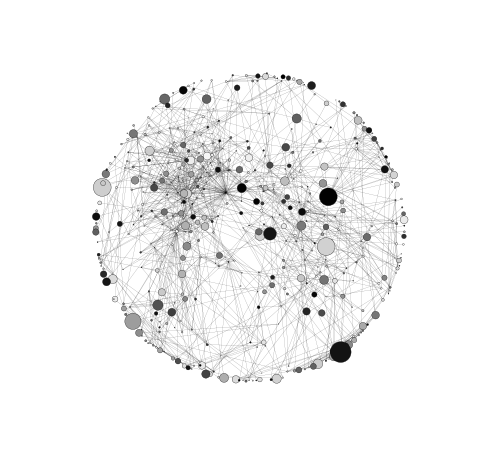

In [38]:
plt.figure(figsize=(6,6));
# P is a dictionary of position of different elements
P = nx.spring_layout(RG);

## change the node color and node size
node_sizes = [Strength[i] * 30 for i in range(len(Ori))]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=P, node_size=node_sizes, width=.1, node_color=node_colors, edge_color = 'black');

# Add labeles to the Plot
#nx.draw_networkx_labels(RG,pos=P); # semicolon suppresses output

Now that we have a populated network, let's plot it! We will use networkx's `draw()` functions.

**Deliverable**
* You should create a plot of the network. The position of every node (`pos`) should be defined by the lat and lon of the given node. The **color** and **size** of the nodes should be dependent on one of the node properties.

In [39]:
# Draw the network here
## Add latitute and longtitute to the plot

# review the data structure of 'df_nodes'
df_fromto.head(1)

,FROM-ID,LAT1,LON1,DISTANCE,TO-ID,LAT2,LONG2
0,4e5bcac318388cd5cbc1a9c5,24.711829,46.673158,0.028214,4b6afa55f964a5202fea2be3,24.711269,46.67446


In [40]:
# Let's define an empty undirected graph.
RG = nx.Graph()

# We also define the values for the edge attributes
keys = ['from-id', 'lat1', 'lon1', 'distance', 'to-id', 'lat2','lon2']
i = 0
# itertuples is a function that read every row of the dataframe
for row in df_fromto.itertuples(index=False):
    i +=1
    # If we use all the nodes, plotting the network takes a very long time!
    if i < 5000:
        values = row[2:]
        # "ZIP" is the function that We can create a dictionary with the keys and row values
        edge_attributes = dict(zip(keys, values))
        # We add the edge to the graph
        RG.add_edge(*(row[0], row[4]), attr_dict=edge_attributes)
degrees = nx.degree(RG)
print row # test what is the variable 'row' in function df.itertuples(index=False)
print edge_attributes

Pandas(_0='560a6995498e3c55b65fd97f', LAT1=24.80161558, LON1=46.603435580000003, DISTANCE=0.018129066999999999, _4='561920ab498e0c5c48df227d', LAT2=24.801635000000001, LONG2=46.603658000000003)
{'lon1': '561920ab498e0c5c48df227d', 'from-id': 46.603435580000003, 'lat1': 0.018129066999999999, 'to-id': 46.603658000000003, 'distance': 24.801635000000001}


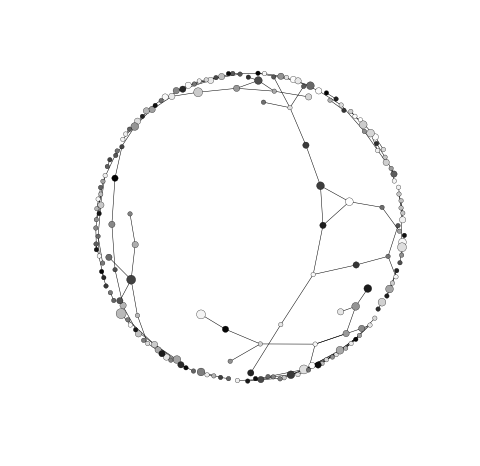

In [41]:
# Plotting might take a bit! We can stand up and stretch for a bit!
plt.figure(figsize=(6,6))
P = nx.spring_layout(RG)

#  Here we multiply the degree value times 50 to see the difference in size on our plot.
node_sizes = [v * 20 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=node_colors);

In [46]:
nodes_df = pd.read_csv("data/FoursqureCheckinNodes.csv", sep=",")
nodes_df.head(2)

loc_dict = {}
for node_index in RG.nodes():
    loc_dict[node_index] = (float(nodes_df.loc[(node_index)]['LAT']), float(nodes_df.loc[(node_index)]['LONG']))
    
plt.figure(figsize=(15,15))

node_sizes = [v * 3 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=node_sizes, width=.5, node_color=node_colors);

KeyError: 'the label [51081ee0e4b093dcac39e0ec] is not in the [index]'

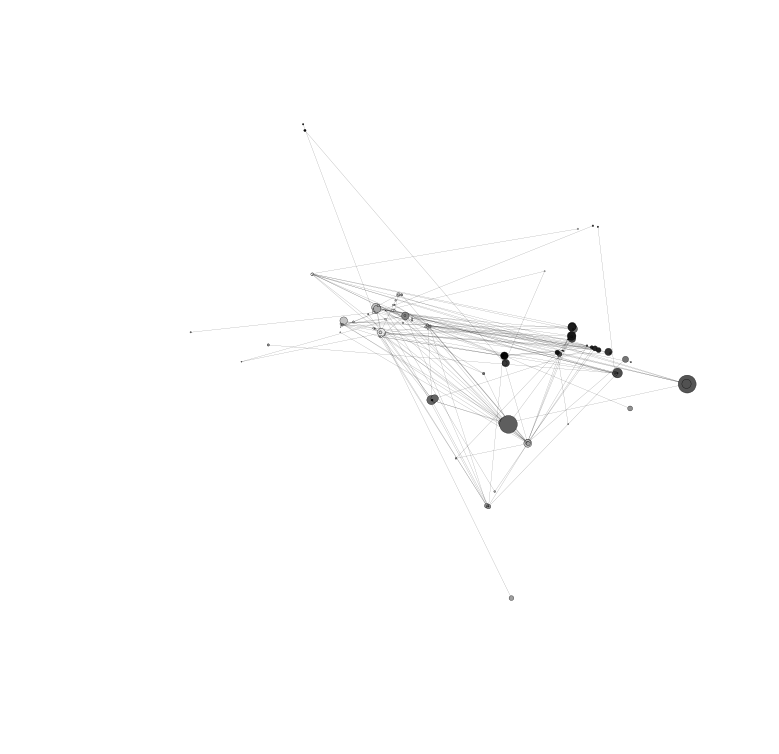

In [51]:
nodes_df = pd.read_csv("data/FoursqureCheckinNodes.csv", sep=",")
nodes_df.head(2)

loc_dict = {}
global k
k = 0;
for node_index in RG.nodes():
    global k;
    loc_dict[node_index] = (float(nodes_df.loc[k]['LAT']), float(nodes_df.loc[k]['LONG']))
    k = k + 1;

plt.figure(figsize=(10,10))

node_sizes = [Strength[i] * 30 for i in range(len(Ori))]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=node_sizes, width=.1, node_color=node_colors, edge_color = 'black');

## Part 3
Now that we have the network, it is useful to calculate some of it's properties to gain insights of the region.

First, we will obtain the node degrees, and create a histogram that shows the distribution of the degrees across the network nodes'.

**Deliverable**
* You should create a histogram showing the degree distribution across the network. The **x-axis** should have the different degrees, and the **y-axis** should have the number of observations.

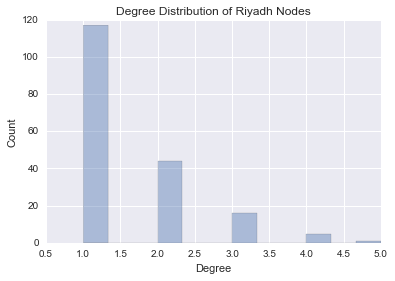

In [81]:
# Create your histogram here
sns.set_style("darkgrid")
plt.figure()
sns.set_style("darkgrid")
sns.distplot(degrees.values(), kde=False)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Riyadh Nodes')

plt.show()

Finally, let's look at another useful network property: **centrality**. Centrality indicators help identify the most important vertices within a graph. With centrality algorithms, it is possible to identify key infrastructure nodes in urban networks.

We will be using 2 centrality measures: degree centrality and betweeness centrality. **Betweenness** is a centrality measure of a vertex within a graph. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. Conceptually, edges that are more important to the functioning of the network will have a higher betweenness centrality. For `networkx`, the betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

Historically first and conceptually simplest centrality measure is **degree centrality**, which is defined as the number of links incident upon a node (the number of ties that a node has). For `networkx`,  the degree centrality for a node v is the fraction of nodes it is connected to.

Using networkx's built-in function, calculate the **degree** and **betweenness** centrality of the network, and create 2 plots of the network, where either the color or the size of the node is dependent on both **centrality** measure. 

**Deliverable**
* You should create a plot of the network. The position of every node (`pos`) should be defined by the lat and lon of the given node. The **color** or **size** of the nodes should be dependent on the centrality measure corresponding to the plot (1 plot for degree, and one for betweenness). The other property not represented by the centrality should depend on another property of the network.

[54.94505494505495, 27.472527472527474, 82.41758241758242, 54.94505494505495, 54.94505494505495]


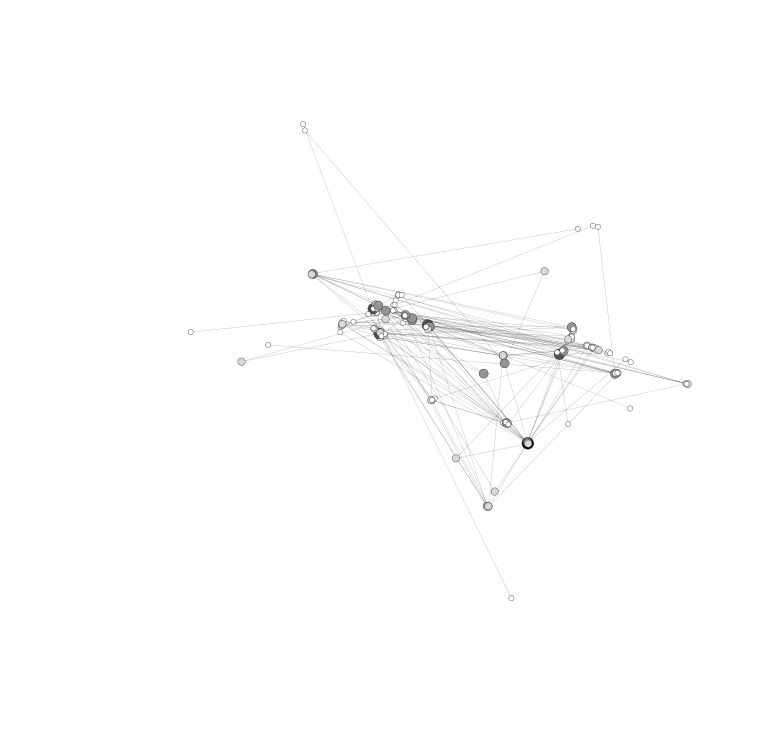

In [102]:
# Your code here
# Plot Degree_Centrality Map
central= nx.degree_centrality(RG)
size_central=[]

for node_index in RG.nodes():
    size_central.append(central[(node_index)]*5000)

print size_central[0:5]


plt.figure(figsize=(10,10))

node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=size_central, width=.1, node_color=size_central, edge_color = 'black')

[1.5033259200000002, 2.51342058, 1.3853815799999998, 1.7103660000000001, 0.89242473]
1578
[54.94505494505495, 27.472527472527474, 82.41758241758242, 54.94505494505495, 54.94505494505495]


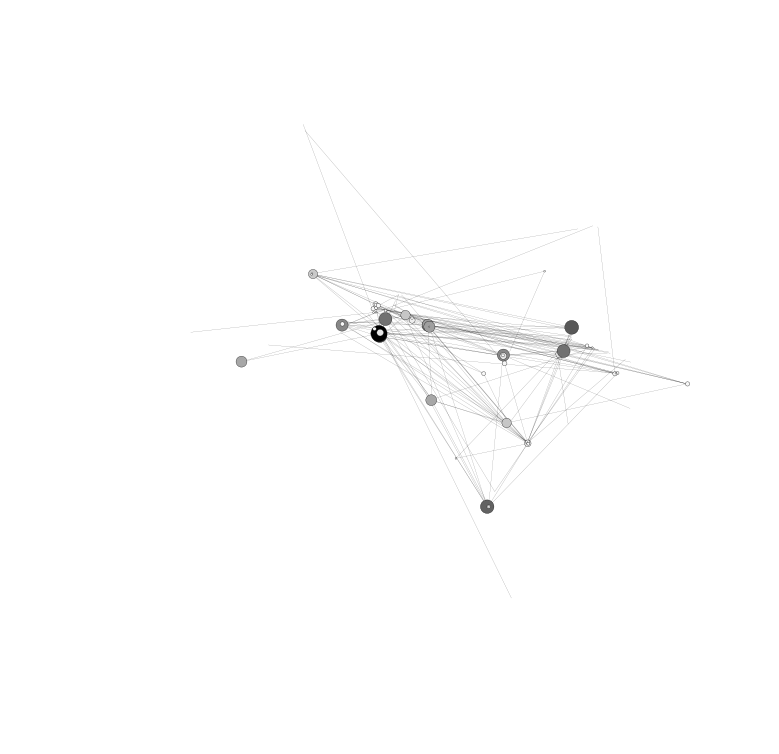

In [105]:
## Plot Betweenness_Centrality Map
between= nx.betweenness_centrality(RG)
size_between=[]
for node_index in RG.nodes():
    size_between.append(between[(node_index)]*50000)

plt.figure(figsize=(10,10))

print node_sizes[0:5]
print len(node_sizes)
print size_central[0:5]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=size_between, width=.1, node_color=size_between, edge_color = 'black');